In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.15.0


In [5]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
RESHAPED = 784

In [9]:
X_train  = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [13]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical (Y_test, 10)

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [15]:
model_0.add(Dense(10,input_shape=(784,), name='dense_layer', activation='softmax'))

In [16]:
model_0.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
training=model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 4s 4ms/step - loss: 1.0993 - accuracy: 0.7420 - val_loss: 0.6566 - val_accuracy: 0.8549
Epoch 2/70
750/750 [==============================] - 3s 4ms/step - loss: 0.6096 - accuracy: 0.8534 - val_loss: 0.5096 - val_accuracy: 0.8733
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5140 - accuracy: 0.8694 - val_loss: 0.4510 - val_accuracy: 0.8864
Epoch 4/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4676 - accuracy: 0.8780 - val_loss: 0.4182 - val_accuracy: 0.8913
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.8843 - val_loss: 0.3972 - val_accuracy: 0.8963
Epoch 6/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4188 - accuracy: 0.8875 - val_loss: 0.3821 - val_accuracy: 0.8992
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4038 - accuracy: 0.8912 - val_loss: 0.3708 - val_accuracy: 0.9003
Epoch 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


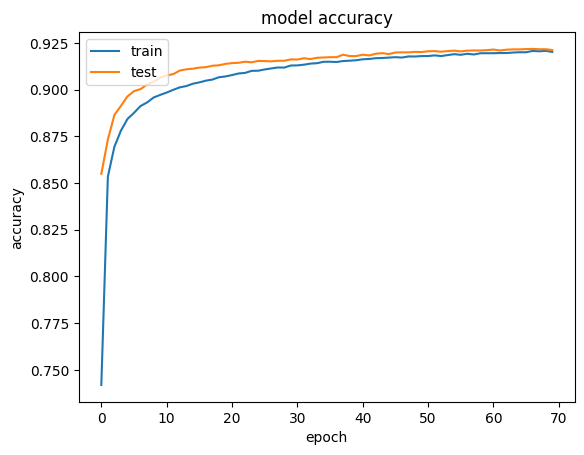

In [18]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

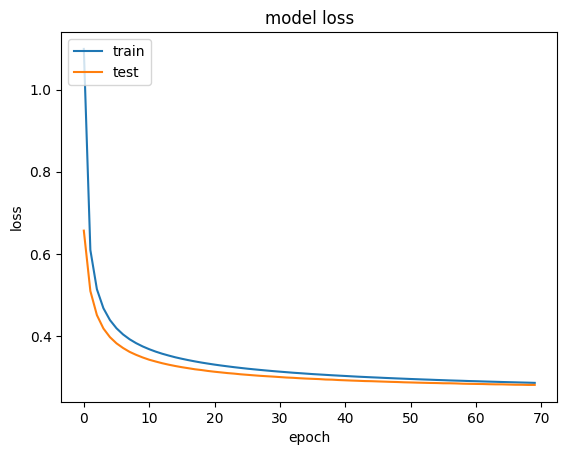

In [19]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9215
Test accuracy: 0.921500027179718


In [21]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras.layers import Dropout

model_2 = tf.keras.Sequential()
N_hidden = 128

In [23]:
model_2.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu' ))
model_2.add(Dropout (0.3))

In [24]:
model_2.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

In [25]:
model_2.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [26]:
model_2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 4ms/step - loss: 1.2776 - accuracy: 0.6062 - val_loss: 0.5111 - val_accuracy: 0.8710
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.6353 - accuracy: 0.8066 - val_loss: 0.3663 - val_accuracy: 0.8991
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5034 - accuracy: 0.8478 - val_loss: 0.3130 - val_accuracy: 0.9097
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4447 - accuracy: 0.8689 - val_loss: 0.2784 - val_accuracy: 0.9188
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4005 - accuracy: 0.8834 - val_loss: 0.2563 - val_accuracy: 0.9246
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3694 - accuracy: 0.8911 - val_loss: 0.2369 - val_accuracy: 0.9309
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3412 - accuracy: 0.8991 - val_loss: 0.2208 - val_accuracy: 0.9352
Epoch 

In [28]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


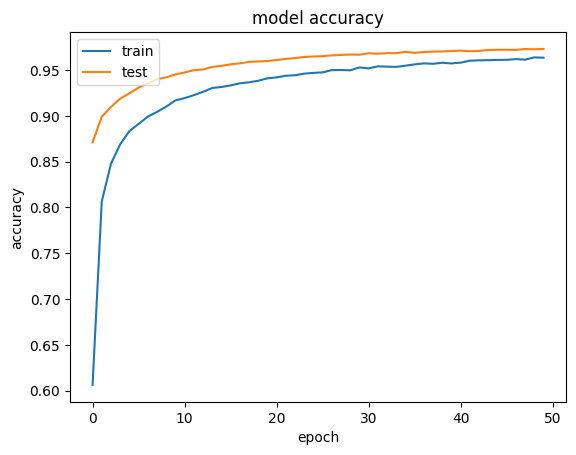

In [29]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

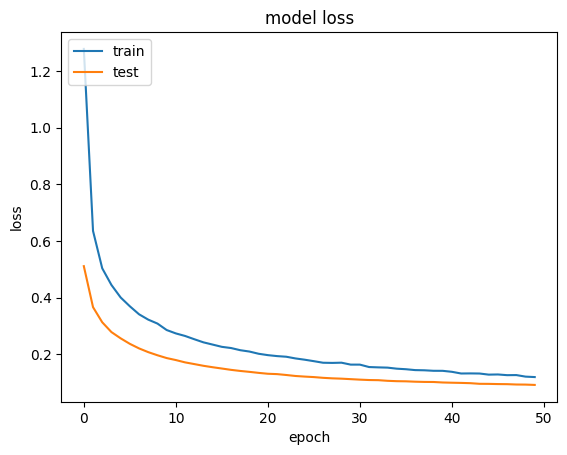

In [30]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model_2.weights[0]

<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.03763357, -0.02967321, -0.05704698, ..., -0.05716342,
        -0.01004221,  0.04822219],
       [ 0.07620499,  0.04504975, -0.0078808 , ...,  0.01791595,
         0.08013693,  0.05954856],
       [ 0.06055   ,  0.03968776, -0.07122638, ..., -0.04611413,
         0.00383809,  0.02677558],
       ...,
       [-0.06848659, -0.07976911,  0.00940648, ...,  0.03837703,
         0.00433932,  0.05737337],
       [ 0.01285076, -0.04955764,  0.06941123, ...,  0.07157167,
         0.00241464, -0.03145651],
       [ 0.0076728 ,  0.06779341,  0.044521  , ...,  0.00140982,
         0.0598296 ,  0.0101784 ]], dtype=float32)>

In [32]:
test_loss, test_acc  = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


In [33]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.03763357, -0.02967321, -0.05704698, ..., -0.05716342,
         -0.01004221,  0.04822219],
        [ 0.07620499,  0.04504975, -0.0078808 , ...,  0.01791595,
          0.08013693,  0.05954856],
        [ 0.06055   ,  0.03968776, -0.07122638, ..., -0.04611413,
          0.00383809,  0.02677558],
        ...,
        [-0.06848659, -0.07976911,  0.00940648, ...,  0.03837703,
          0.00433932,  0.05737337],
        [ 0.01285076, -0.04955764,  0.06941123, ...,  0.07157167,
          0.00241464, -0.03145651],
        [ 0.0076728 ,  0.06779341,  0.044521  , ...,  0.00140982,
          0.0598296 ,  0.0101784 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.083843  , -0.0114522 , -0.04901008,  0.07201925, -0.04155479,
         0.02174373,  0.08990559, -0.08325162, -0.00078588,  0.07123784,
         0.07330935,  0.01708767,  0.00204278,  0.0471178 , -0.04

In [42]:
model_3 = tf.keras.Sequential()
N_hidden = 64

In [43]:
model_3.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

In [44]:
model_3.add(Dropout(0.3))

In [45]:
model_3.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))

In [46]:
model_3.add(Dropout(0.3))

In [47]:
model_3.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [48]:
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.7086 - accuracy: 0.7810 - val_loss: 0.2378 - val_accuracy: 0.9308
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3439 - accuracy: 0.9000 - val_loss: 0.1772 - val_accuracy: 0.9471
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2772 - accuracy: 0.9193 - val_loss: 0.1535 - val_accuracy: 0.9554
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2386 - accuracy: 0.9297 - val_loss: 0.1326 - val_accuracy: 0.9605
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2118 - accuracy: 0.9382 - val_loss: 0.1250 - val_accuracy: 0.9632
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1983 - accuracy: 0.9412 - val_loss: 0.1167 - val_accuracy: 0.9644
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1822 - accuracy: 0.9454 - val_loss: 0.1162 - val_accuracy: 0.9658
Epoch 

In [50]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


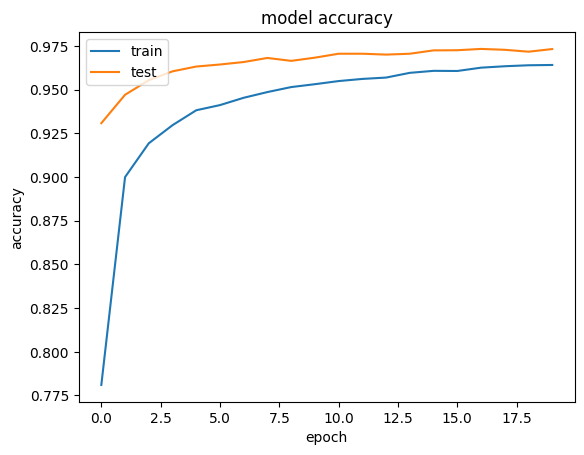

In [51]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

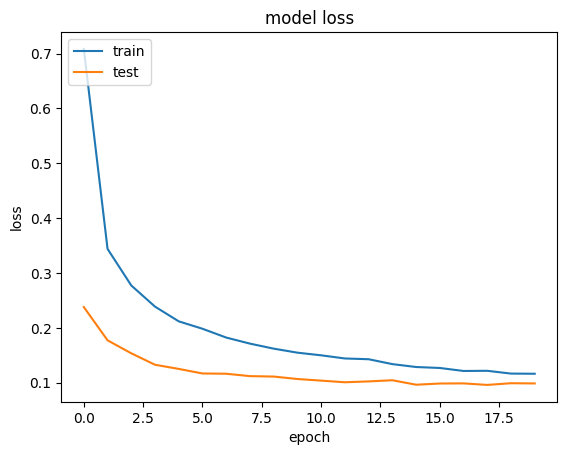

In [52]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9729
Test accuracy: 0.9728999733924866


In [56]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 64)                50240     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.06267823, -0.08118621, -0.03012017, ..., -0.0610993 ,
          0.04585799,  0.07390522],
        [ 0.03727693, -0.01641568,  0.02977771, ..., -0.01366659,
          0.02098943, -0.05976223],
        [ 0.07640568, -0.06487722,  0.0742742 , ..., -0.08358516,
         -0.00021737,  0.08346523],
        ...,
        [ 0.01451523,  0.04547799,  0.05357718, ..., -0.03467184,
          0.07977694, -0.07186066],
        [ 0.00213972,  0.03148942, -0.06824279, ...,  0.06985437,
          0.05199786,  0.02642598],
        [-0.00167068, -0.07563891, -0.00072625, ..., -0.0548974 ,
          0.02734844, -0.05012238]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-9.81056243e-02,  6.29633814e-02,  4.27554063e-02, -1.08886890e-01,
        -6.03034608e-02,  1.25756010e-01, -4.06208068e-01, -1.08343307e-02,
         2.00612284e-03, -3.25407535e-02,  1.24385193e-01,  1

In [57]:
model_4 = tf.keras.Sequential()
N_hidden = 512

In [58]:
model_4.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

In [59]:
model_4.add(Dropout (0.3))

In [60]:
model_4.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))

In [61]:
model_4.add(Dropout (0.3))

In [62]:
model_4.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [65]:
model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)

Epoch 1/31
375/375 [==============================] - 3s 4ms/step - loss: 0.3043 - accuracy: 0.9072 - val_loss: 0.1301 - val_accuracy: 0.9605
Epoch 2/31
375/375 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.9619 - val_loss: 0.0976 - val_accuracy: 0.9697
Epoch 3/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0925 - accuracy: 0.9710 - val_loss: 0.0847 - val_accuracy: 0.9747
Epoch 4/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 0.0884 - val_accuracy: 0.9731
Epoch 5/31
375/375 [==============================] - 2s 6ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.0863 - val_accuracy: 0.9754
Epoch 6/31
375/375 [==============================] - 2s 6ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0788 - val_accuracy: 0.9778
Epoch 7/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9853 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 

In [67]:
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9819
Test accuracy: 0.9818999767303467


In [68]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


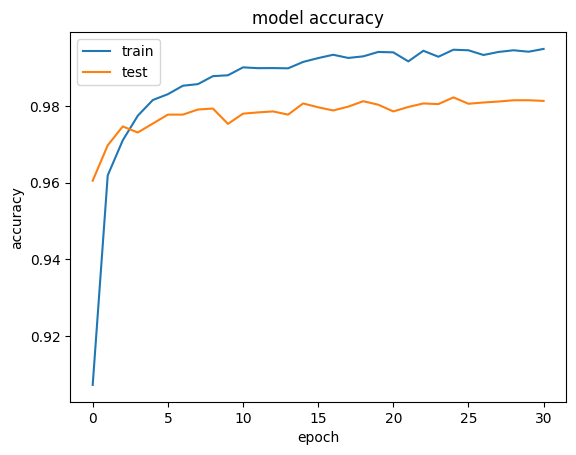

In [69]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

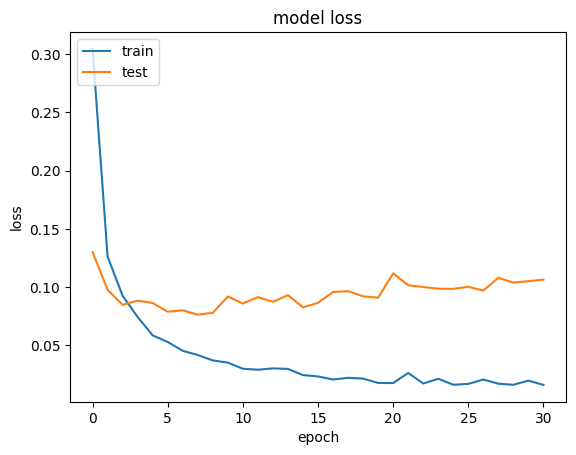

In [70]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00022309, -0.02937781,  0.05724147, ...,  0.06284802,
         -0.04645483, -0.024847  ],
        [-0.03194689,  0.03572912,  0.01549602, ..., -0.00092606,
          0.01757031,  0.03218033],
        [ 0.04181808, -0.04426425,  0.06601734, ..., -0.02979424,
         -0.00128922, -0.00737688],
        ...,
        [-0.05846552, -0.01103409, -0.04217624, ...,  0.06430589,
         -0.0158201 ,  0.02173855],
        [ 0.06042647, -0.0389515 ,  0.01231793, ..., -0.00343143,
         -0.06536228,  0.04307815],
        [ 0.0334084 ,  0.0509374 , -0.04772264, ..., -0.01149659,
          0.01066954, -0.02509215]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 6.64875284e-02, -7.15514272e-02,  2.81967111e-02,  9.11036581e-02,
        -4.85546887e-02, -6.03244230e-02, -7.06934109e-02,  1.00049794e-01,
        -6.54454827e-02,  4.49353456e-02, -1.23402044e-01, 

In [75]:
model_5= tf.keras.Sequential()
N_hidden = 512

In [76]:
model_5.add(Dense (N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

In [77]:
model_5.add(Dropout(0.3))

In [78]:
model_5.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))

In [79]:
model_5.add(Dropout (0.3))

In [80]:
model_5.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [81]:
model_5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 0.2696 - accuracy: 0.9177 - val_loss: 0.1245 - val_accuracy: 0.9626
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1212 - accuracy: 0.9632 - val_loss: 0.0983 - val_accuracy: 0.9685
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0941 - accuracy: 0.9705 - val_loss: 0.0819 - val_accuracy: 0.9758
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0735 - accuracy: 0.9774 - val_loss: 0.0799 - val_accuracy: 0.9770
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.1009 - val_accuracy: 0.9707
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.9817 - val_loss: 0.0901 - val_accuracy: 0.9747
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0851 - val_accuracy: 0.9778
Epoch 

In [83]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


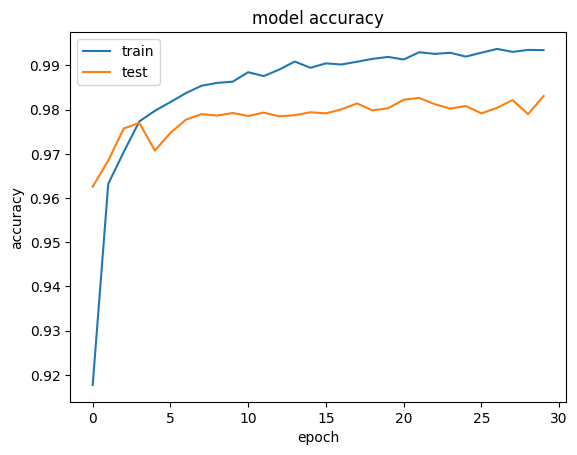

In [84]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

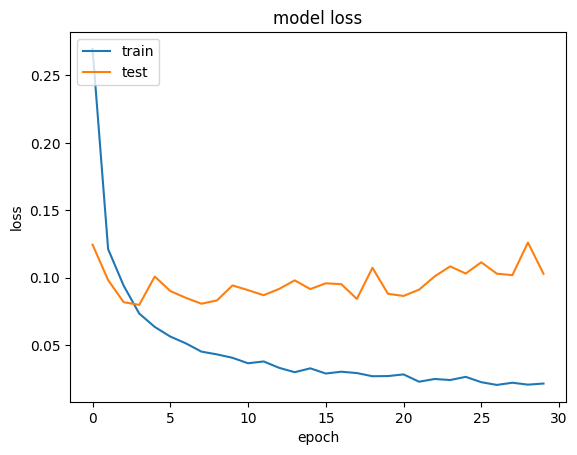

In [85]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02072208, -0.05148338, -0.01835518, ...,  0.03941897,
         -0.03464788,  0.03645946],
        [-0.00090373,  0.00682876,  0.05015442, ...,  0.01664332,
          0.02090149, -0.06148396],
        [-0.02697467, -0.00061087, -0.03373114, ...,  0.0229011 ,
          0.01816705,  0.01656936],
        ...,
        [ 0.0419779 ,  0.0600338 ,  0.057667  , ...,  0.01851646,
          0.02869096,  0.05094876],
        [-0.05598863, -0.03300938,  0.02834116, ...,  0.01218516,
         -0.02682069, -0.06751333],
        [-0.00486238, -0.00348488, -0.03629677, ...,  0.03583227,
          0.06475651,  0.01098408]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 1.64134167e-02, -1.92983881e-01, -8.46973658e-02, -1.44323269e-02,
         1.41206970e-02, -2.38958467e-02, -3.95917520e-03, -2.28185896e-02,
         2.91502159e-02,  3.07908878e-02, -1.15549549e-01, 